In [1]:
##1
## Importing Modules

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm #just to get the progress bar 
import random
warnings.filterwarnings('ignore')

%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D ,Dropout, Flatten, MaxPooling2D, Input


In [2]:
##2 (CHANGER LA DIRECTORY)
## Load Dataset

BASE_DIR=r"C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset"

In [3]:
##3
#labels: race, gender, ethnicity


image_paths=[]
age_labels=[]
gender_labels=[]


for filename in tqdm(os.listdir(BASE_DIR)): #iterates in all the files inside the direcetory
    image_path=os.path.join(BASE_DIR,filename)
    temp=filename.split('_') #on split le nom de l'image selon les _ pour avoir age , date etc..
    if len(temp) >= 3 and all(p.isdigit() for p in temp[:3]):
        age =int(temp[0])#premier element de la liste
        gender =int(temp[1])#second element de la liste
        image_paths.append(image_path)
        age_labels.append(age)
        gender_labels.append(gender)
    else:
        print(f"Skipping file with unexpected format: {filename}")
    #la barre en bas montre que we loaded all the images 
    

  0%|          | 0/24108 [00:00<?, ?it/s]

Skipping file with unexpected format: 39_1_20170116174525125.jpg
Skipping file with unexpected format: 53__0_20170116184028385.jpg
Skipping file with unexpected format: 61_1_20170109142408075.jpg
Skipping file with unexpected format: 61_3_20170109150557335.jpg


In [4]:
##4
#convert my images into a data frame
df=pd.DataFrame()
df['image_path'],df['age'],df['gender']=image_paths, age_labels, gender_labels # ce sont les colonnes de mon dataframe
df.sample(10) #cette commande nous permet de voir 10 lignes aléatoire, on a creer a proper dataframe


image_path  age  gender
16009  C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   40       1
5097   C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   24       1
7822   C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   26       1
6466   C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   26       0
14953  C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   38       1
15253  C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   39       1
8088   C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   26       1
11676  C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   31       1
7146   C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   26       1
2798   C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...    1       1

In [5]:
##5
#define labels of gender
gender_dict={0:'Male',1:'Female'}

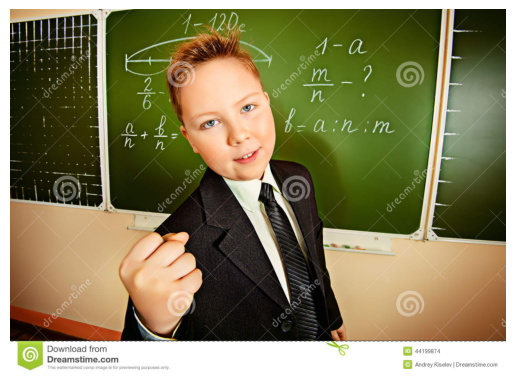

In [6]:
##6
# Exploratory Data Analysis
from PIL import Image  # PIL est un module utilise pour loader des images 
img= Image.open(df['image_path'][random.randint(0, len(df) - 1)]) #on ouvre juste une image aléatoire
plt.axis('off')
plt.imshow(img);
#for better image preproceessing et ne pas surcharge la RAM, La RAM EST LIMITE on utilise grayscale et on la reesize

In [7]:
##10
## Extracting features
from tensorflow.keras.preprocessing.image import load_img

def extract_features(images):
    features=[]
    for image in tqdm (images):
         #on ne peux pas  se permettre de load toutes les images en RGB: 3 dimensions  et prendre toute la memoire
        img = load_img(image)
        #img = load_img(image, color_mode='grayscale')
        img=img.resize((128,128),Image.ANTIALIAS)
        img=np.array(img)
        features.append(img)
        
    #we convert the features to a numpy array
    features=np.array(features) # cette etape est obligatoire car les neurals network gere que les array 
    features=features.reshape(len(features),128,128,3) #ca prend en arguments number fo features, width, height et la dimension
    # dans notre cas grayscale image ducoup dimension=1
    #dans le cas ou on sera rester en RGB, on oublie ceci 
    return features 
    
        

In [8]:
##11
X=extract_features(df['image_path'])

  0%|          | 0/24104 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
##12
X.shape
#on verifie bien que la dernier valeur est 1 cad il est en graycale

In [ ]:
##13
#normalize the images 
X=X/255.0 #la valeur dee la pixel est de 0-255 maintenant  elle sera de la range 0 to 1 

In [ ]:
##14
y_gender=np.array(df['gender']) #on convertit to numpy
y_age=np.array(df['age']) #on convertir to numpy 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Définir la taille des batchs
batch_size = 32
valid_batch_size = 32

# Définir la forme d'entrée (exemple)
input_shape = (128, 128, 3)

# Définir le modèle séquentiel
model_gender = Sequential()

# Ajouter les couches convolutionnelles et de pooling
model_gender.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_gender.add(MaxPooling2D(pool_size=(2, 2)))

model_gender.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_gender.add(MaxPooling2D(pool_size=(2, 2)))

# Ajouter une couche Flatten pour aplatir les données
model_gender.add(Flatten())

# Ajouter les couches entièrement connectées avec Dropout
model_gender.add(Dense(128, activation='relu'))
model_gender.add(Dropout(0.3))

# Ajouter la couche de sortie pour la prédiction du genre
model_gender.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model_gender.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Définir le callback pour sauvegarder le modèle complet
checkpoint_callback = ModelCheckpoint(
    filepath='GenderPersonelModel.keras',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

# Entraîner le modèle
history = model_gender.fit(
    x=X, 
    y=y_gender, 
    epochs=50, 
    batch_size=batch_size, 
    validation_split=0.2, 
    callbacks=[checkpoint_callback]
)



In [ ]:
# Plotting the training history for loss and accuracy
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé
model = load_model('ModelGender.keras') # a updaté pour 'GenderPersonelModel.keras'

# Préparer les nouvelles données pour la prédiction

# IL FAUT RUN LES CODES AU DEBUT JUSQU'AU NUMERO 10
random_image_paths = df['image_path'].sample(n=25, random_state=30).tolist()

# Remplacez ceci par vos propres données à prédire
X_new = extract_features(random_image_paths)  # Par exemple, un NumPy array avec les mêmes dimensions que les données d'entraînement

# Faire des prédictions
predictions = model.predict(X_new)

# Afficher les résultats
print(predictions)


  0%|          | 0/25 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
[[1.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [2.92155929e-29]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [9.03000236e-02]
 [1.02766836e-26]
 [0.00000000e+00]
 [9.72552456e-22]
 [1.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99997079e-01]
 [5.17943301e-22]
 [1.21078916e-31]
 [6.23174647e-34]
 [1.00000000e+00]
 [4.51964112e-26]
 [1.00000000e+00]
 [1.00000000e+00]]


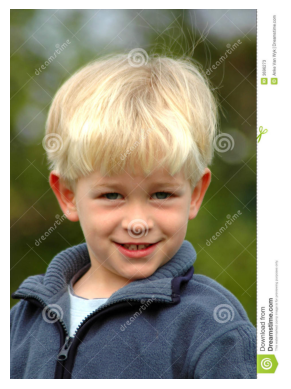

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\6_0_0_20170110215527972.jpg


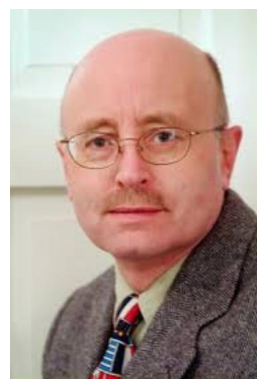

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\53_0_0_20170104212407239.jpg


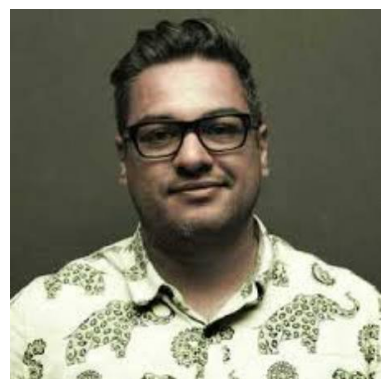

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\37_0_3_20170119194814724.jpg


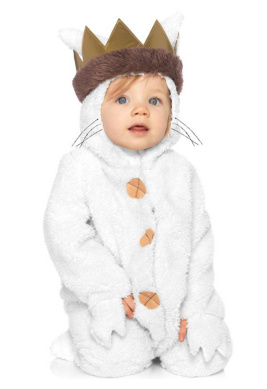

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\2_1_0_20170109191752762.jpg


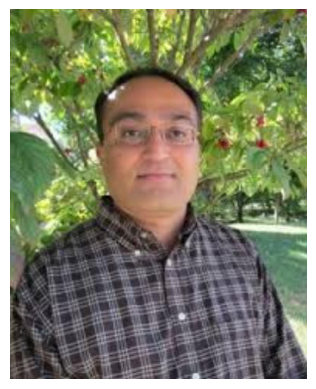

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\40_0_3_20170104165011263.jpg


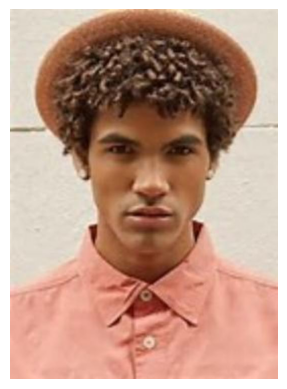

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\20_0_1_20170113132730457.jpg


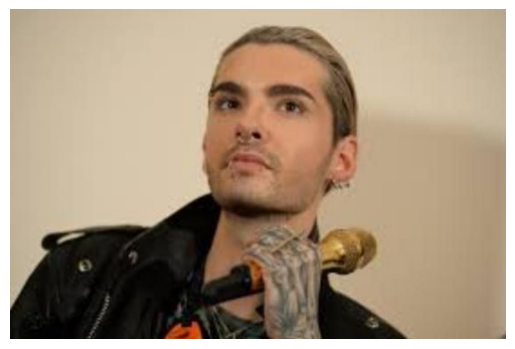

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\26_0_0_20170116232619054.jpg


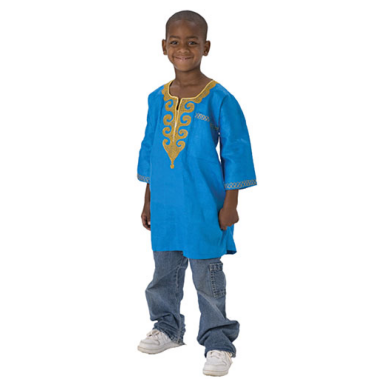

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\9_0_1_20170110215500987.jpg


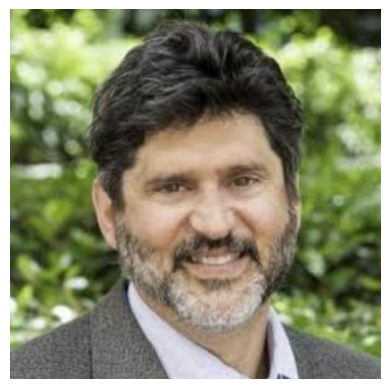

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\47_0_4_20170104210443652.jpg


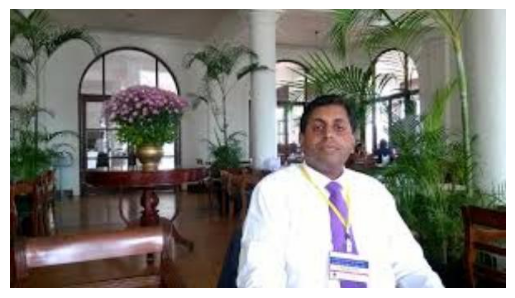

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\48_0_3_20170119205339015.jpg


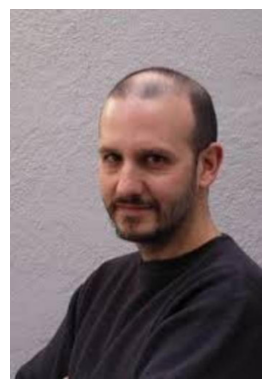

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\35_0_0_20170117180339845.jpg


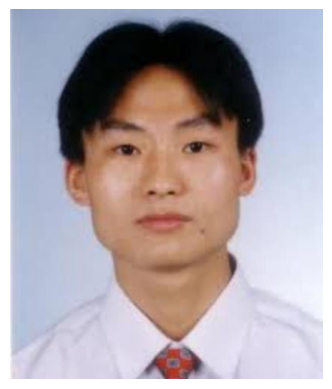

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\28_0_2_20170113190312841.jpg


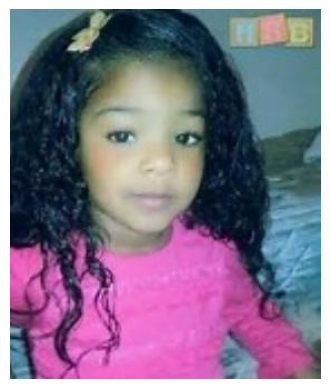

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\5_1_1_20170104010044345.jpg


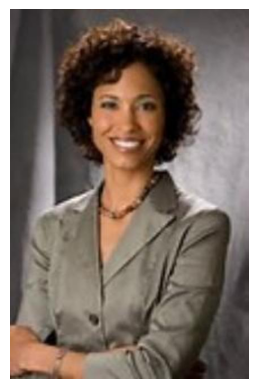

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\47_1_1_20170113001956524.jpg


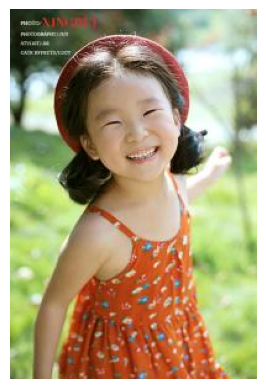

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\5_1_2_20161219203429011.jpg


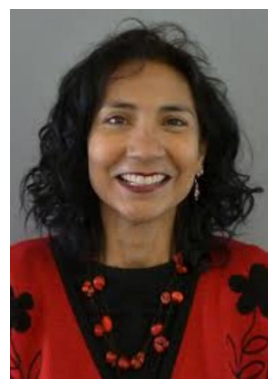

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\35_1_2_20170117092216605.jpg


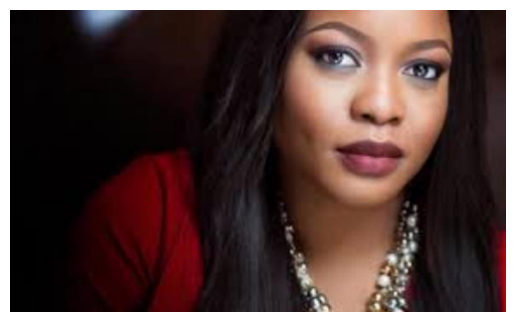

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\37_1_1_20170116222809020.jpg


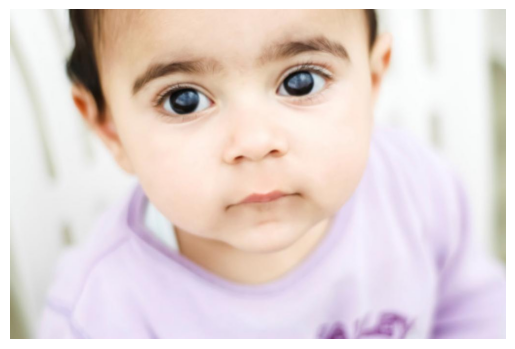

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\1_0_3_20161220222642427.jpg


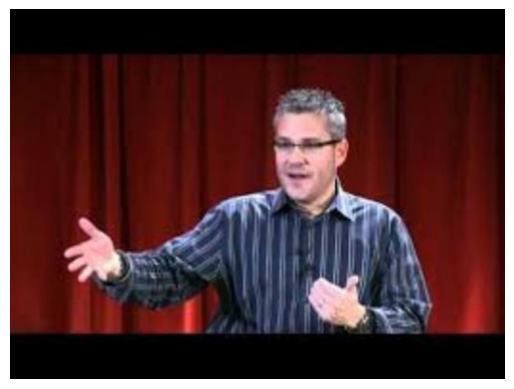

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\36_0_0_20170117090959247.jpg


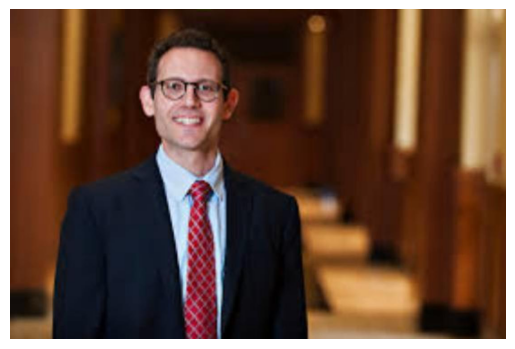

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\41_0_0_20170117133125264.jpg


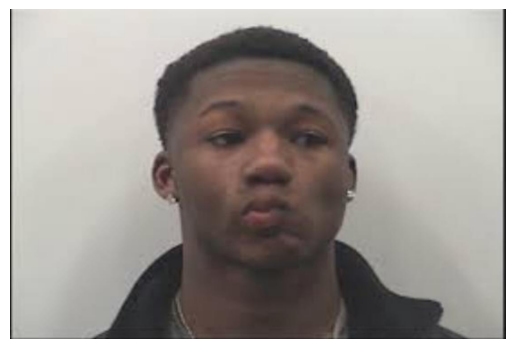

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\23_0_1_20170117194052028.jpg


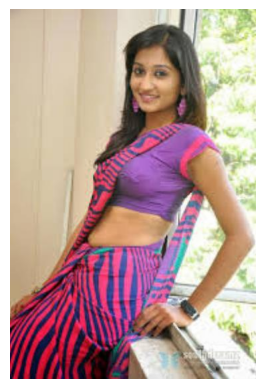

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\26_1_3_20170104235016242.jpg


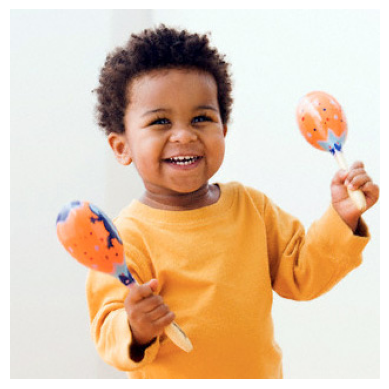

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\2_0_1_20170110205407227.jpg


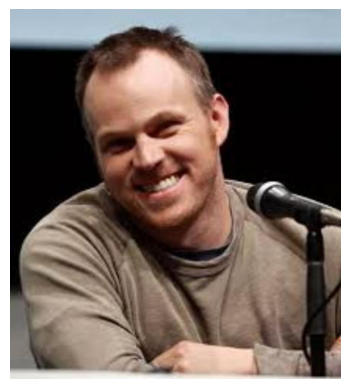

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\37_0_0_20170117140050797.jpg


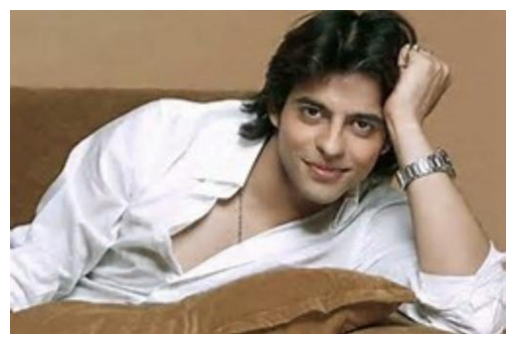

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\25_1_3_20170117142157226.jpg


In [12]:
from PIL import Image

for img_path in random_image_paths:
    img = Image.open(img_path)
    plt.figure()
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    print(img_path)


In [20]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé
model = load_model('ModelGender.keras') # a updaté pour 'GenderPersonelModel.keras'

# Préparer les nouvelles données pour la prédiction

# IL FAUT RUN LES CODES AU DEBUT JUSQU'AU NUMERO 10
selected_image_path = [r"C:\Users\Gabriel\Desktop\Photo_de_moi\2005\DSC03620.JPG",r"C:\Users\Gabriel\Downloads\download.jpeg",r"C:\Users\Gabriel\Downloads\download (1).jpeg",r"C:\Users\Gabriel\Downloads\877b01f7092146efb33a6848e786d892.jpg"]

# Remplacez ceci par vos propres données à prédire
X_new = extract_features(selected_image_path)  # Par exemple, un NumPy array avec les mêmes dimensions que les données d'entraînement

# Faire des prédictions
predictions = model.predict(X_new)

# Afficher les résultats
print(predictions)


  0%|          | 0/4 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[[5.7646285e-28]
 [3.6782689e-27]
 [0.0000000e+00]
 [1.0000000e+00]]
